# Clase 2. Red neuronal vectorizada Mini Batch con numpy

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import MT19937
from numpy.random import RandomState, SeedSequence
rs = RandomState(MT19937(SeedSequence(123456789)))

In [2]:
TRAIN_DATASET_FILENAME = "data/clase_2_train_data.csv"
TEST_DATASET_FILENAME = "data/clase_2_test_data.csv"

In [3]:
train_ds = np.genfromtxt(TRAIN_DATASET_FILENAME, skip_header=True, delimiter=',')
X_train = train_ds[:,0:2]
y_train = train_ds[:,2:]
X_train.shape, y_train.shape

((900, 2), (900, 1))

In [4]:
test_ds = np.genfromtxt(TRAIN_DATASET_FILENAME, skip_header=True, delimiter=',')
X_test = test_ds[:,0:2]
y_test = test_ds[:,2:]
X_test.shape, y_test.shape

((900, 2), (900, 1))

# Versión 1. Sin POO 

In [6]:
class Sigmoid:
    def __init__(self):
        pass
    
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

Text(0, 0.5, 'Loss')

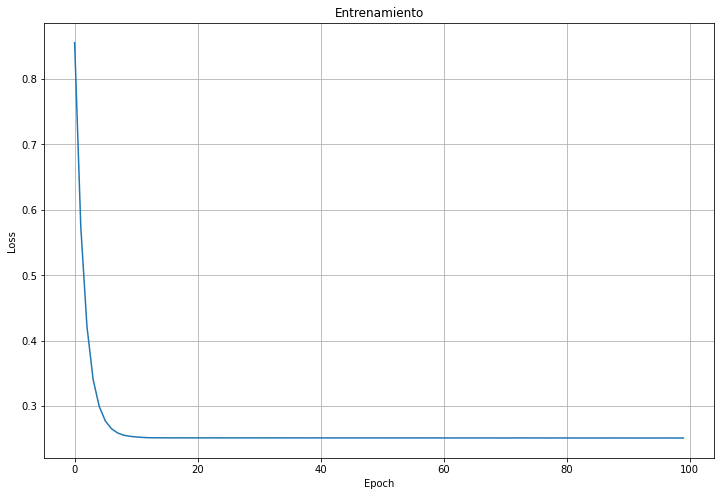

In [8]:
# Model definition
INPUT_LAYER_N_FEAT = 2
LAYER_1_N_INPUTS = INPUT_LAYER_N_FEAT 
LAYER_1_N_NEURONS = 3
LAYER_2_N_INPUTS = LAYER_1_N_NEURONS
LAYER_2_N_NEURONS = 2
OUTPUT_LAYER_N_INPUTS = LAYER_2_N_NEURONS
OUTPUT_LAYER_N_NEURONS = 1

class MiniBatchGD:
    def __init__(self):
        pass
    
    def train(self,X_train, y_train, lr=0.01, amt_epochs=1,batch_size=32, callbacks=[]):
        n = X_train.shape[0] # number of samples
        m = X_train.shape[1] # number of features     
                    
        # Layer 1
        W1 = np.random.rand(LAYER_1_N_INPUTS, LAYER_1_N_NEURONS)
        b1 = np.random.rand(LAYER_1_N_NEURONS, 1)
        g1 = Sigmoid()

        # Layer 2
        W2 = np.random.rand(LAYER_2_N_INPUTS, LAYER_2_N_NEURONS)
        b2 = np.random.rand(LAYER_2_N_NEURONS, 1)
        g2 = Sigmoid()

        # Output Layer
        W3 = np.random.rand(OUTPUT_LAYER_N_INPUTS, OUTPUT_LAYER_N_NEURONS)
        b3 = np.random.rand(OUTPUT_LAYER_N_NEURONS, 1)
        g3 = Sigmoid()
        
        params = {}
        params["W1"] = W1
        params["b1"] = b1
        params["g1"] = g1
        params["W2"] = W2
        params["b2"] = b2
        params["g2"] = g2
        params["W3"] = W3
        params["b3"] = b3
        params["g3"] = g3
        params["lr"] = lr
                
        train_history = []        
        for i in range(amt_epochs):
            idx = np.random.permutation(X_train.shape[0])
            X_train = X_train[idx]
            y_train = y_train[idx]
            
            #print("batch_size:",batch_size)
            epoch_average_loss = 0
            for i in range(0, len(X_train), batch_size):            
                end = i + batch_size if i + batch_size <= len(X_train) else len(X_train)                
                batch_X = X_train[i: end]
                batch_y = y_train[i: end]        
                
                #print(f"Iteration {i}")
                batch_loss = callbacks["on_batch"](batch_X,batch_y,params)
                epoch_average_loss += np.sum(batch_loss)
                
            epoch_average_loss = epoch_average_loss / len(X_train)
            train_history.append(epoch_average_loss)
        return np.array(train_history)
                
def on_batch(X,y,params):    
    batch_size = X.shape[0]
    num_features = X.shape[1]
    X_input = X.T
    y_target = y.T
    
    # Load params from dictionary
    W1 = params["W1"]    
    b1 = params["b1"]
    g1 = params["g1"]
    W2 = params["W2"]
    b2 = params["b2"]
    g2 = params["g2"]
    W3 = params["W3"]
    b3 = params["b3"]
    g3 = params["g3"]
    lr = params["lr"]
            
    # 1) Forward pass and compute error
    #print("1) Forward Pass")
    
    # 1.1 Layer 1
    assert(X_input.shape[0]==W1.shape[0])    
    z1 = W1.T@X_input + b1 # broadcasting magic.         
    a1 = g1(z1)
    #print("X_input.shape:", X_input.shape)
    #print("z1.shape:", z1.shape)
    #print("a1.shape:", a1.shape)
    
    # 1.2 Layer 2
    z2 = W2.T@a1 + b2
    a2 = g2(z2)    
    #print("z2.shape:", z2.shape)
    #print("a2.shape:", a2.shape)
    
    # 1.3 Layer 3
    a3 = W3.T@a2 + b3
    z3 = g3(a3)      
    y_hat = a3
    j = (y_target-y_hat)**2
    #print("z3.shape:", z3.shape)
    #print("a3.shape:", a3.shape)
    #print("y_hat.shape",y_hat.shape)
    
    # 2) Backward pass (compute gradients)
    #print("2) Backward Pass")
            
    # 2.1 Output layer
    #print(" 2.1 Output layer")
    assert a2.shape==(num_features,batch_size)
    dZ3 = -2*(y_target-y_hat)* (g3(z3)*(1-g3(z3)))
    assert dZ3.shape==(1,batch_size)
    dW3 = (1/batch_size)*(dZ3@a2.T)
    db3 = (1/batch_size)*np.sum(dZ3,axis=1,keepdims=True)
    #print("dZ3.shape",dZ3.shape)
    #print("dW3.shape",dW3.shape)
    #print("db3.shape",db3.shape)
    

    # 2.2 Layer 2
    #print(" 2.2 Layer 2")
    dZ2 = np.multiply(W3@dZ3,g2(z2)*(1-g2(z2)))
    dW2 = (1/batch_size)*(dZ2@a3.T)
    db2 = (1/batch_size)*np.sum(dZ2,axis=1,keepdims=True)
    #print("dZ2.shape",dZ2.shape)
    #print("dW2.shape",dW2.shape)
    #print("db2.shape",db2.shape)

    # 2.3 Layer 1
    #print(" 2.3 Layer 1")
    dZ1 = np.multiply(W2@dZ2,g1(z1)*(1-g1(z1)))
    dW1 = (1/batch_size)*(dZ1@X_input.T)
    db1 = (1/batch_size)*np.sum(dZ1,axis=1,keepdims=True)
    #print("dZ1.shape",dZ1.shape)
    #print("dW1.shape",dW1.shape)
    #print("db1.shape",db1.shape)

    # 3) Parameter update                      
    #print("3) Parameter update")
    W1 = W1 - lr*dW1.T
    b1 = b1 - lr*db1
    #print("W1.shape",W1.shape)
    #print("b1.shape",b1.shape)
    
    W2 = W2 - lr*dW2.T
    b2 = b2 - lr*db2
    #print("W2.shape",W2.shape)
    #print("b2.shape",b2.shape)
    
    W3 = W3 - lr*dW3.T
    b3 = b3 - lr*db3
    #print("W3.shape",W3.shape)
    #print("b3.shape",b3.shape)
          
    # Update params from dictionary
    params["W1"] = W1
    params["b1"] = b1
    params["W2"] = W2
    params["b2"] = b2
    params["W3"] = W3
    params["b3"] = b3
    
    return j

LEARNING_RATE = 0.01
BATCH_SIZE = 32
N_EPOCHS = 100


optimizer = MiniBatchGD()
train_history = optimizer.train(X_train,y_train,LEARNING_RATE,N_EPOCHS,BATCH_SIZE,callbacks={ 
    "on_batch": on_batch
})

epochs = np.arange(N_EPOCHS)
plt.figure(figsize=(12,8))
plt.plot(epochs,train_history)
plt.grid(which="Both")
plt.title("Entrenamiento")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Versión 2. POO 

In [ ]:

    
class Layer:
    def __init__(self,activation_fn=Sigmoid):
        self.act_fn = activation_fn
        pass
    
    def forward(self):
        raise  NotImplementedError
        
    def backward(self):
        raise  NotImplementedError
        
    def update_parameters(self):
        raise  NotImplementedError
        
    def grad(self,z,a,y,y_hat,batch_size):
        """
        z,a: de la capa anterior
        error: 
        """        
        print("y.shape:", y.shape)
        assert(y.shape==y_hat.shape)
        dZ = -2*(y-y_hat)*self.activation_fn(z)*(1-self.activation_fn(z))        
        print("dZ.shape:", dZ.shape)
        dW = (1/batch_size)*dZ*A.T
        db = np.sum(dZ,axis=1,keep_dims=True)
        return dW,db        
        
class FullyConnected(Layer):
    def __init__(self,n_inputs, n_neurons,activation_fn=Sigmoid):        
        Layer.__init__(self,activation_fn)
        self.W = np.random.rand(n_inputs, n_neurons)
        self.b = np.random.rand(n_inputs, 1)
        
    def forward(self,X):
        """
        Ojo! X acá tiene cada fila como columna, 
        o sea, si x1, x2, ... xm son las m muestras del batch_size
        En lugar de ser 
        X = [
            [x1],
            [x2],
            ...
            [xm]
        ]
        ahora será:
        X = [[x1,x2,...,xm]]
        """
        z = self.W.T@X+self.b # 3x1
        print("Z shape: ", z.shape)
        a = self.act_fn(z)
        print("a shape: ", z.shape)
        
        
        return y_hat
        
    def backward(self):
        print("backward_pass")
        #grad_W = 0
        #grad_b= 0
        
    def update_parameters(self):
        print("update_parameters")
        
class BinaryOutput(Layer):
    def __init__(self,n_inputs):
        Layer.__init__(self)
        self.W = np.random.rand(n_inputs, 1)
        self.b = np.random.rand(1, 1)
        
    def forward(self):
        print("forward_pass")
        
    def backward(self):
        print("backward_pass")
        
    def update_parameters(self):
        print("update_parameters")          
                
    def cost(self, y, y_hat):
        j = 1/batch_size * np.sum((y-y_hat)**2)
    
        
class SequentialModel:
    
    def __init__(self):
        self.layers = []
        self.last_output_dims = None
        pass
    
    def add_layer(self,l):
        self.layers.append(l)
        
    def train(self,X_train,Y_train,X_test,Y_test):
        return 0
        
    def predict(self,X):
        return 0  
